In [1]:
from keras.models import Sequential
# from keras.utils import image_dataset_from_directory

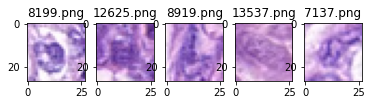

In [18]:
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
%matplotlib inline
# plt.figure(figsize=(20,20))
img_folder=r'Image_classification_data/binary-task/1'

def display_images(amount, img_folder):
    for i in range(amount):
        file = random.choice(os.listdir(img_folder))
        image_path= os.path.join(img_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,amount,i+1)
        ax.title.set_text(file)
        plt.imshow(img)

display_images(5, img_folder)

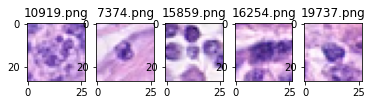

In [19]:
img_folder=r'Image_classification_data/binary-task/0'
display_images(5, img_folder)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
path = "Image_classification_data/split_binary-task/train"
train_bin = datagen.flow_from_directory(path, class_mode="categorical")

Found 16223 images belonging to 2 classes.


In [9]:
path = "Image_classification_data/split_binary-task/val"
val_bin = datagen.flow_from_directory(path, class_mode="categorical")

Found 4057 images belonging to 2 classes.


In [10]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

path = "Image_classification_data/split_binary-task/train"
train_bin = image_dataset_from_directory(path, labels="inferred", image_size=(27,27))

Found 16223 files belonging to 2 classes.


2022-04-28 15:46:47.064932: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
labels = list(train_bin.unbatch().map(lambda x, y: y))
print(len(labels))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16223


In [20]:
path = "Image_classification_data/split_binary-task/val"
val_bin = image_dataset_from_directory(path, labels="inferred", image_size=(27,27))

Found 4057 files belonging to 2 classes.


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.applications import xception
from keras.losses import BinaryCrossentropy
# model = xception(weights=None, input_shape=(256, 256, 3), classes=10)

#build a sequential model
model_ann = Sequential()
model_ann.add(Dense(16, input_shape=[27,27,3], activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.6))
model_ann.add(Flatten())
model_ann.add(Dense(2, activation='softmax'))

# compile model
model.compile(loss=BinaryCrossentropy(), optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
model.fit(train_bin, epochs=10, validation_data=val_bin)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
506/507 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.3487WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f7ad37367a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [24]:
from keras.layers import Conv2D, MaxPooling2D,Activation, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras import Model
model = Sequential()
model.add(Conv2D(16,(5,5),padding='valid',input_shape = [27,27,3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.4))
model.add(Conv2D(32,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.6))
# model.add(Conv2D(64,(5,5),padding='valid'))
# model.add(Activation('relu'))
# model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

model_feat = Model(inputs=model.input,outputs=model.get_layer('activation_10').output)
feat_train = model_feat.predict(train_bin)

ValueError: No such layer: activation_10. Existing layers are: ['conv2d_30', 'activation_11', 'max_pooling2d_29', 'dropout_17', 'conv2d_31', 'activation_12', 'max_pooling2d_30', 'dropout_18', 'flatten_11', 'dense_27', 'activation_13'].